In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
x_train[10]

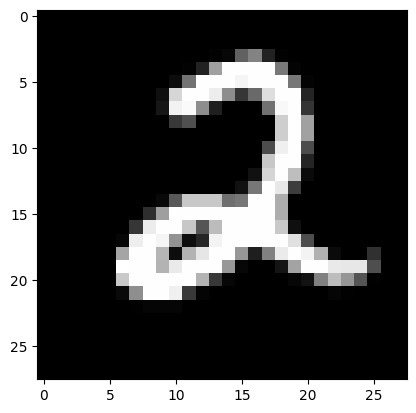

In [ ]:
plt.imshow(x_train[3333], cmap='gray')
plt.show()

In [ ]:
y_train[3333]

2

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(5, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(input_shape=(24, 24, 5)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
res = model(x_train[3333:3334])
print(res)

tf.Tensor(
[[ 2.45094343e-05  1.84905279e-04  2.06855329e-04 -6.46493572e-04
   4.28954663e-04  1.11713045e-04  1.69285573e-04  4.20337659e-04
  -3.41352599e-04 -9.48370071e-05]], shape=(1, 10), dtype=float32)


In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 8s 3ms/step - loss: 0.6015 - accuracy: 0.8260
Epoch 2/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2631 - accuracy: 0.9228
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1905 - accuracy: 0.9443
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1463 - accuracy: 0.9567
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1191 - accuracy: 0.9649
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1016 - accuracy: 0.9694
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0897 - accuracy: 0.9732
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0806 - accuracy: 0.9759


In [ ]:
import numpy as np

In [ ]:
y_train[600]

9

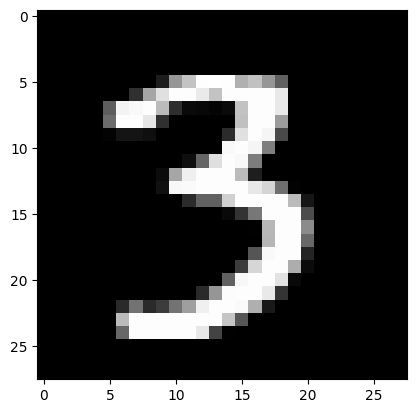

In [ ]:
plt.imshow(x_train[10000], cmap='gray')
plt.show()

In [ ]:
tf.argmax(model(x_train[10000:10001]), axis=1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([3])>

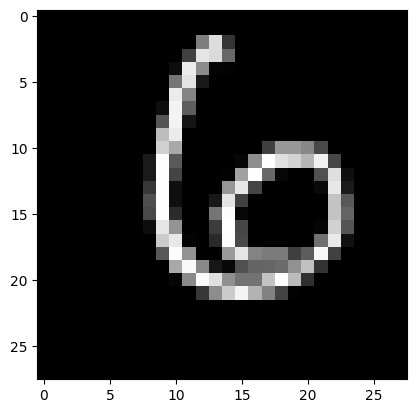

In [ ]:
plt.imshow(x_test[100], cmap='gray')
plt.show()

In [ ]:
test = x_test[100:102]

In [ ]:
test.shape

(2, 28, 28)

In [ ]:
predictions = model(x_test[100:110])

In [ ]:
predictions

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[ -2.212473  ,  -6.2784066 ,   0.9836991 ,  -4.085353  ,
         -0.05173768,  -3.9346123 ,   9.43868   ,  -4.915133  ,
          0.31451106,  -7.41244   ],
       [ 11.056046  ,  -4.307813  ,  -0.4032059 ,  -2.1600418 ,
        -13.414314  ,   1.2869358 ,   0.19871238,  -3.7872872 ,
         -4.175263  ,  -0.2720342 ],
       [-22.654598  , -14.311201  , -11.497396  ,   5.5171576 ,
        -17.702759  ,  15.014435  , -22.137358  ,  -4.540884  ,
          0.272765  ,   2.8292508 ],
       [-12.120122  ,  -6.878927  ,   2.1259515 ,  -6.532569  ,
         13.957396  ,  -9.25627   ,  -2.579704  ,  -3.1148052 ,
         -5.5450015 ,  -0.2533386 ],
       [-12.489485  ,  -7.322199  ,  -3.1140156 ,  -1.4874967 ,
          0.45534295,   1.9719226 ,  -7.724405  ,  -4.0201554 ,
          0.15489146,   5.571061  ],
       [ -7.3242674 , -15.21475   ,  -1.4867117 ,  -2.0640314 ,
          2.1764467 ,  -2.7244546 , -10.654459  ,  -1.9568074

In [ ]:
tf.argmax(predictions, axis=1)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([6, 0, 5, 4, 9, 9, 2, 1, 9, 4])>

In [ ]:
y_test[990:1000]

array([2, 3, 9, 0, 1, 2, 2, 0, 8, 9], dtype=uint8)

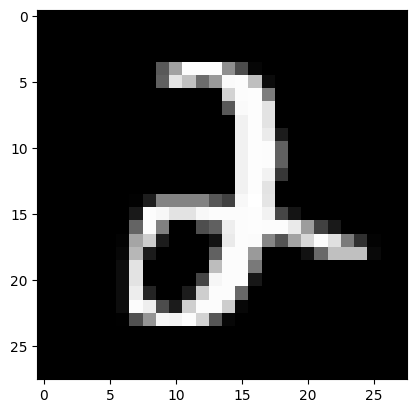

In [ ]:
plt.imshow(x_test[990], cmap='gray')
plt.show()

In [ ]:
loss_fn(y_test[990:1000], predictions)

<tf.Tensor: shape=(), dtype=float32, numpy=10.263632>

Train and evaluate your model

In [ ]:
model.evaluate(x_test,  y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1219 - accuracy: 0.9643


[0.12189815938472748, 0.9642999768257141]

In [ ]:
print(y_test[:5])

[7 2 1 0 4]


In [ ]:
test_prediction = model(x_test[:5])

In [ ]:
print(tf.argmax(test_prediction, axis=1))

tf.Tensor([7 2 1 0 4], shape=(5,), dtype=int64)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Studies/1.Classification - MNIST
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Studies/1.Classification - MNIST
'Classifier - MNIST - Beginner.ipynb'   mnis_7.png   mnist_5.png
 mnis_2.png                             mnis_8.png


In [ ]:
from PIL import Image
from io import BytesIO

In [ ]:
loaded_image = Image.open("mnis_2.png")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mnist_5.png to mnist_5 (1).png


In [ ]:
loaded_image = Image.open(BytesIO(uploaded['mnist_5.png']))

In [ ]:
loaded_image

In [ ]:
import numpy as np

In [ ]:
loaded_image = loaded_image.resize((28,28))

In [ ]:
np.array(loaded_image).shape

(28, 28, 3)

In [ ]:
loaded_image = loaded_image.convert('L')

In [ ]:
loaded_image

In [ ]:
l_image = np.array(loaded_image)

In [ ]:
l_image.shape

(28, 28)

In [ ]:
l_image = np.expand_dims(l_image, axis=0)

In [ ]:
l_image.shape

(1, 28, 28)

In [ ]:
l_image = l_image / 255.0

In [ ]:
l_prediction = model(l_image)

In [ ]:
l_prediction

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ 1595.5405 , -3101.846  , -1638.19   , -1258.1774 , -1141.6467 ,
         -569.98615,  2515.802  ,  1072.0596 ,    95.34495, -1233.1835 ]],
      dtype=float32)>

In [ ]:
print(tf.argmax(l_prediction, axis=1).numpy())

[6]


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.Flatten(input_shape=(26, 26, 10)),
  tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10),
  #tf.keras.layers.Softmax()
])